In [8]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as ptc

%matplotlib inline

In [9]:
# Data reading

data = pd.read_csv('fire.csv')

data.sample(10)

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
267961,-30.00822,152.37720,299.7,0.38,0.36,2019-11-13,1454,N,VIIRS,n,1.0NRT,285.4,0.7,N
520432,-32.85167,150.32620,344.1,0.47,0.40,2019-12-10,330,N,VIIRS,n,1.0NRT,314.4,20.2,D
362002,-30.77566,124.11369,301.5,0.53,0.42,2019-11-22,1706,N,VIIRS,n,1.0NRT,286.2,0.9,N
337333,-23.08092,130.95311,367.0,0.40,0.37,2019-11-20,448,N,VIIRS,l,1.0NRT,330.6,15.4,D
926357,-19.79568,143.75348,367.0,0.32,0.55,2020-01-06,324,N,VIIRS,h,1.0NRT,304.3,10.3,D
587088,-32.65340,150.63916,324.0,0.35,0.57,2019-12-17,1412,N,VIIRS,n,1.0NRT,288.2,1.3,N
303468,-17.45909,123.93406,367.0,0.50,0.49,2019-11-17,542,N,VIIRS,l,1.0NRT,325.4,106.5,D
669912,-35.73481,136.89368,301.6,0.70,0.75,2019-12-21,1442,N,VIIRS,n,1.0NRT,271.8,3.3,N
828655,-32.55846,122.00778,367.0,0.33,0.55,2020-01-01,454,N,VIIRS,h,1.0NRT,311.4,162.4,D
91039,-31.11798,145.71735,299.8,0.40,0.45,2019-10-20,1542,N,VIIRS,n,1.0NRT,281.7,1.2,N


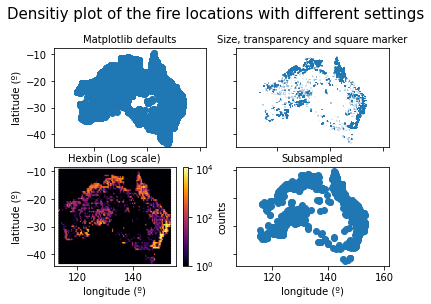

In [10]:
fig, ax = plt.subplots(2, 2)

fig.suptitle('Densitiy plot of the fire locations with different settings', fontsize=15, y=1.025)

# Common settings
for a in ax.flat:
    a.axis('equal')
    a.set_xlabel('longitude (º)')
    a.set_ylabel('latitude (º)')
    a.label_outer()

# Matplotlib defaults
ax[0, 0].scatter(data['longitude'], data['latitude'])
ax[0, 0].set_title('Matplotlib defaults', fontsize=10)

# Size, transparency and square marker
size = 0.2 * data['scan'] * data['track'] # One could also add a scale factor here
ax[0, 1].scatter(data['longitude'], data['latitude'], alpha=.025, s=size, marker='s')
ax[0, 1].set_title('Size, transparency and square marker', fontsize=10)

# Hexbin
hb = ax[1, 0].hexbin(data['longitude'], data['latitude'], gridsize=100, bins='log', cmap='inferno')
fig.colorbar(hb, ax=ax[1, 0]).set_label('counts')
ax[1, 0].set_title('Hexbin (Log scale)', fontsize=10)

# Subsampled
n_samples = len(data.index)
samples = np.random.choice(n_samples, int(n_samples/500))
ax[1, 1].scatter(data.loc[samples, 'longitude'], data.loc[samples, 'latitude'])
ax[1, 1].set_title('Subsampled', fontsize=10)

plt.show()

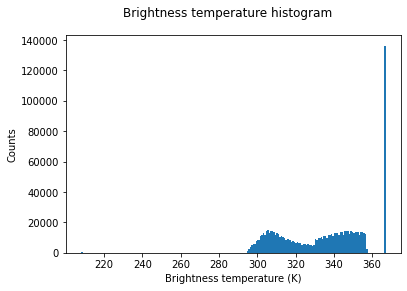

In [11]:
fig, ax = plt.subplots()

fig.suptitle('Brightness temperature histogram')

ax.hist(data['bright_ti4'], bins='auto')
ax.set_xlabel('Brightness temperature (K)')
ax.set_ylabel('Counts')

plt.show()

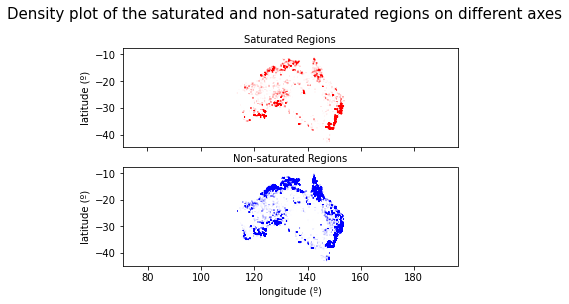

In [12]:
fig, ax = plt.subplots(2)

fig.suptitle('Density plot of the saturated and non-saturated regions on different axes', fontsize=15, y=1.025)

# Common settings
for a in ax.flat:
    a.axis('equal')
    a.set_xlabel('longitude (º)')
    a.set_ylabel('latitude (º)')
    a.label_outer()

size = data['scan'] * data['track'] # One could also add a scale factor here
saturated_values = data['bright_ti4'] == max(data['bright_ti4'])

ax[0].scatter(data.loc[saturated_values, 'longitude'], data.loc[saturated_values, 'latitude'], alpha=.005, s=size.loc[saturated_values], marker='s', color='r')
ax[1].scatter(data.loc[~saturated_values, 'longitude'], data.loc[~saturated_values, 'latitude'], alpha=.005, s=size.loc[~saturated_values], marker='s', color='b')

ax[0].set_title('Saturated Regions', fontsize=10)
ax[1].set_title('Non-saturated Regions', fontsize=10)

plt.show()

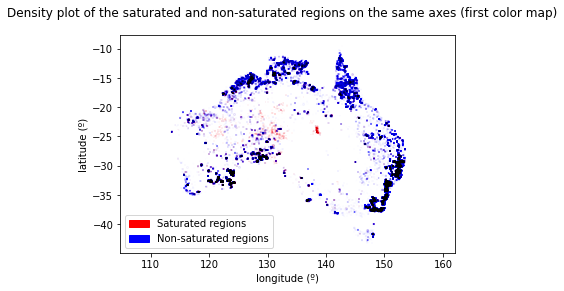

In [13]:
fig, ax = plt.subplots()

fig.suptitle('Density plot of the saturated and non-saturated regions on the same axes (first color map)')

ax.axis('equal')
ax.set_xlabel('longitude (º)')
ax.set_ylabel('latitude (º)')

ax.scatter(data.loc[saturated_values, 'longitude'], data.loc[saturated_values, 'latitude'], alpha=.005, s=4*size.loc[saturated_values], marker='s', color='r')
ax.scatter(data.loc[~saturated_values, 'longitude'], data.loc[~saturated_values, 'latitude'], alpha=.005, s=4*size.loc[~saturated_values], marker='s', color='b')

sat_legend = ptc.Patch(color='r', label='Saturated regions')
non_sat_legend = ptc.Patch(color='b', label='Non-saturated regions')
ax.legend(handles=[sat_legend, non_sat_legend])

plt.show()